In [11]:
!ls /app

CONTRIBUTING.md  docs			mkdocs.yml	  ultralytics.egg-info
LICENSE		 examples		pyproject.toml	  yolov10_lin.ipynb
README.md	 figures		requirements.txt  yolov8n-cls.pt
app.py		 flops.py		runs
docker		 litter_survey_dataset	tests
dockerfile	 logs			ultralytics


In [2]:
!ls /app/examples  

README.md				datasets
YOLOv8-CPP-Inference			heatmaps.ipynb
YOLOv8-LibTorch-CPP-Inference		hub.ipynb
YOLOv8-ONNXRuntime			object_counting.ipynb
YOLOv8-ONNXRuntime-CPP			object_tracking.ipynb
YOLOv8-ONNXRuntime-Rust			runs
YOLOv8-OpenCV-ONNX-Python		tmp.zip
YOLOv8-OpenCV-int8-tflite-Python	tutorial.ipynb
YOLOv8-Region-Counter			yolov8n.pt
YOLOv8-SAHI-Inference-Video		yolov8n.torchscript
YOLOv8-Segmentation-ONNXRuntime-Python	zidane.jpg
bus.jpg


In [2]:
import torch

In [3]:
import ultralytics

In [4]:
import cv2

In [5]:
print('Importing worked! You are all set!')

Importing worked! You are all set!


In [7]:
!ls

CONTRIBUTING.md  docker      figures	 pyproject.toml    ultralytics
LICENSE		 dockerfile  flops.py	 requirements.txt  ultralytics.egg-info
README.md	 docs	     logs	 runs		   yolov10_lin.ipynb
app.py		 examples    mkdocs.yml  tests		   yolov8n-cls.pt


In [8]:
# load frames from mp4 or mov videos

In [10]:
import cv2

def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_rate = 30  # Assuming 30 fps
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_rate == 0:
            yield frame
        count += 1
    cap.release()

In [25]:
import pandas as pd 
low_r_video_path = 'litter_survey_dataset/2024-07-21/Insta360GO2/LRV_20240721_082140_01_096_001.mp4' 
for f in extract_frames(low_r_video_path):
    print(f.shape)
    # frame_df = pd.DataFrame(f)
    break 

(432, 768, 3)


In [26]:
high_r_video_path = 'litter_survey_dataset/2024-07-21/Insta360GO2/VID_20240721_082140_00_096_001.mp4'
for f in extract_frames(high_r_video_path):
    print(f.shape)
    # frame_df = pd.DataFrame(f)
    break 

(1440, 2560, 3)


In [28]:
rayban_mov_video_path = 'litter_survey_dataset/2024-07-21/RayBan/video-21488_singular_display_001.mov'
for f in extract_frames(rayban_mov_video_path):
    print(f.shape)
    # frame_df = pd.DataFrame(f)
    break 

(1428, 1080, 3)


In [2]:
image_path = 'litter_survey_dataset/2024-07-21/RayBan/photo-21700_singular_display_fullPicture.jpeg'

(4032, 3024, 3)

0: 640x480 1 bench, 74.3ms
Speed: 3.9ms preprocess, 74.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
2 2436 791 3849


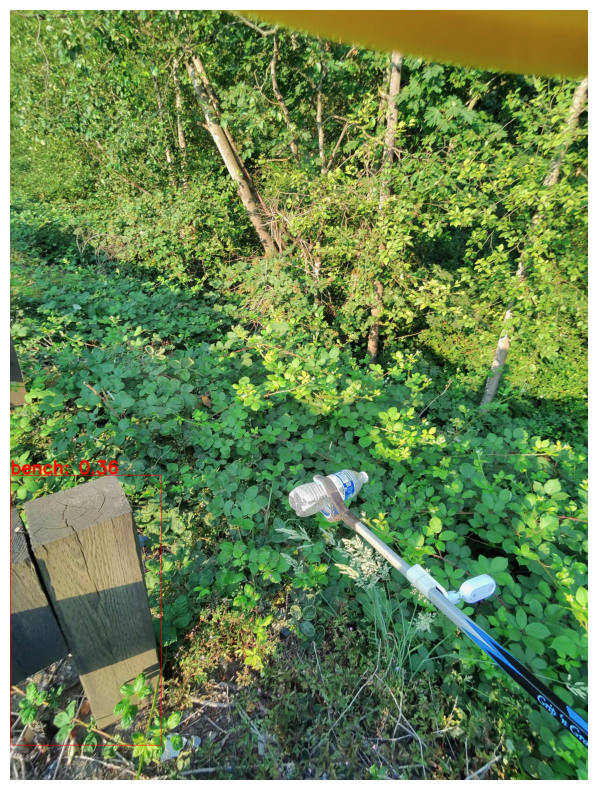

In [11]:
from ultralytics import YOLO
from ultralytics.solutions import object_counter
import cv2
import matplotlib.pyplot as plt


def run_inference(image_path):
    # Read the input image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    
    print(image.shape)
    model = YOLO("yolov8n.pt")
    # Run inference on the image
    results = model(image)
    
    # Loop through the results and draw bounding boxes
    for result in results:
        for box in result.boxes:
            # Get the bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
            print(f"{x1} {y1} {x2} {y2}")
            
            # Draw the bounding box on the image
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red color in RGB
            
            # Get the class label and confidence score
            label = result.names[int(box.cls[0].cpu().numpy())]
            confidence = float(box.conf[0].cpu().numpy())
            
            # Draw the label and confidence score on the image with increased text size
            font_scale = 3  # Increased from 0.5 to 5 for 10x larger text
            thickness = 10  # Increased thickness for better visibility at larger scale
            cv2.putText(image_rgb, f"{label}: {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), thickness, cv2.LINE_AA)
    
    # Display the image with bounding boxes using Matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()



# Run the inference
run_inference(image_path)